In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## Graphical exploratory data analysis

In [2]:
iris = load_iris()
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
target.replace({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}, inplace = True)
df = pd.concat([data, target], axis = 1)
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
setosa_petal_length = df[df.species == 'setosa'].iloc[:, 2]
versicolor_petal_length = df[df.species == 'versicolor'].iloc[:, 2]
virginica_petal_length = df[df.species == 'virginica'].iloc[:, 2]
versicolor_petal_width = df[df.species == 'versicolor'].iloc[:, 3]

### Plotting a histogram of iris data

Text(0, 0.5, 'count')

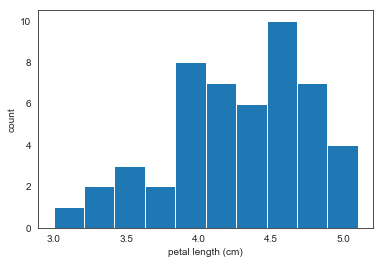

In [5]:
# Set default Seaborn style
sns.set_style('white')

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length);

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

Text(0, 0.5, 'count')

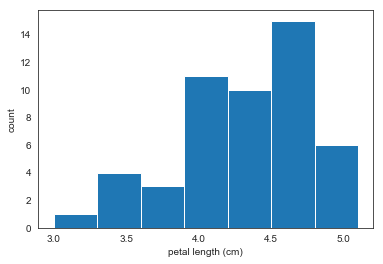

In [6]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

### Bee swarm plot

Text(0, 0.5, 'petal length (cm)')

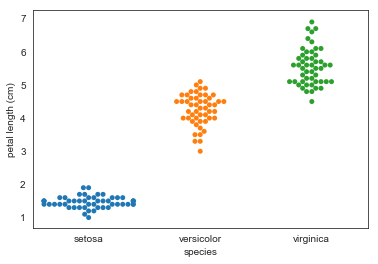

In [7]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

### Computing the ECDF

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

Text(0.5, 0, 'versicolor_petal_length')

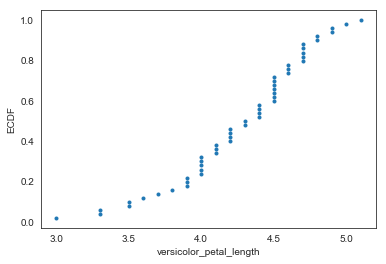

In [9]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes

plt.ylabel('ECDF')
plt.xlabel('versicolor_petal_length')

### Comparison of ECDFs

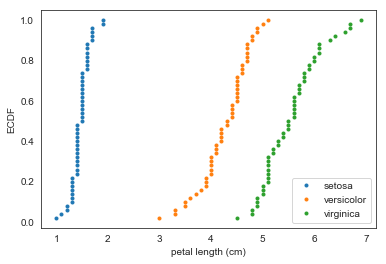

In [10]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)



# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

## Quantitative exploratory data analysis

### Computing means

In [11]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Computing percentiles

In [12]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

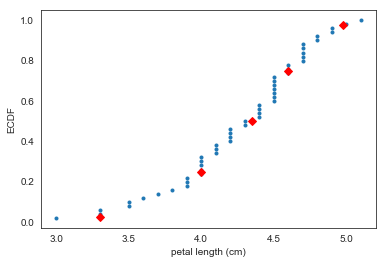

In [13]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

### Box-and-whisker plot

Text(0, 0.5, 'petal length (cm)')

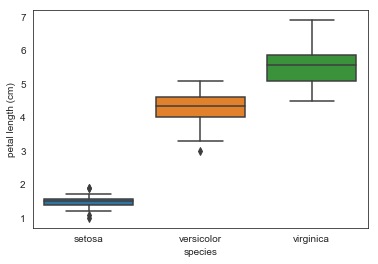

In [14]:
# Create box plot with Seaborn's default settings
sns.boxplot(x = 'species', y = 'petal length (cm)', data = df)

# Label the axes

plt.xlabel('species')
plt.ylabel('petal length (cm)')

### Computing the variance

In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


### The standard deviation and the variance

In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


### Scatter plots

Text(0, 0.5, 'versicolor_petal_width')

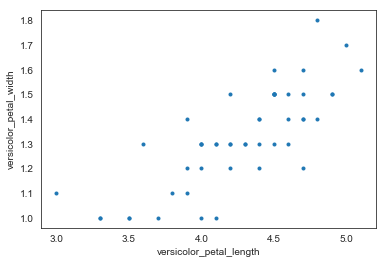

In [17]:
# Make a scatter plot

plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('versicolor_petal_width')

### Computing the covariance

In [18]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

In [19]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Thinking probabilistically-- Discrete variables

### Generating random numbers using the np.random module

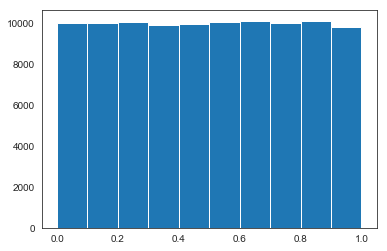

In [20]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

### The np.random module and Bernoulli trials

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
            
    return n_success

### How many defaults might we expect?

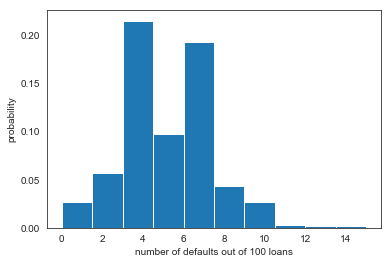

In [22]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

### Will the bank fail?

Probability of losing money = 0.022


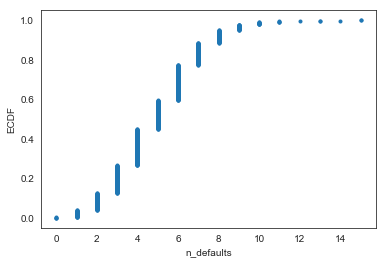

In [23]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Sampling out of the Binomial distribution

Text(0, 0.5, 'ECDF')

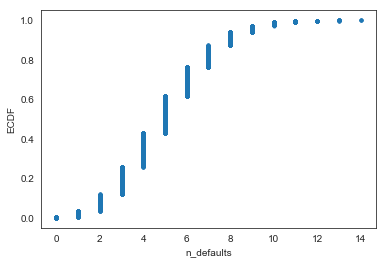

In [24]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

### Plotting the Binomial PMF

Text(0, 0.5, 'count')

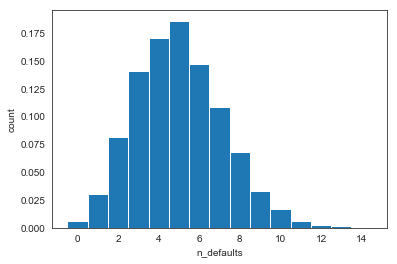

In [25]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density = True, bins = bins)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('count')

### Relationship between Binomial and Poisson distributions

In [26]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


### Was 2015 anomalous?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. 

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [27]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


## Thinking probabilistically-- Continuous variables

### The Normal PDF

(-0.01, 0.42)

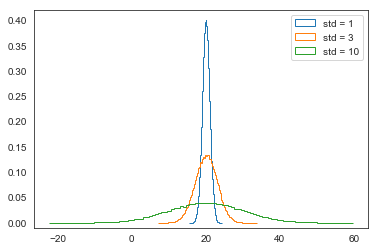

In [28]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, 100000)
samples_std3= np.random.normal(20, 3, 100000)
samples_std10= np.random.normal(20, 10, 100000)


# Make histograms
plt.hist(samples_std1, density = True, histtype = 'step', bins = 100)
plt.hist(samples_std3, density = True, histtype = 'step', bins = 100)
plt.hist(samples_std10, density = True, histtype = 'step', bins = 100)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)

### The Normal CDF

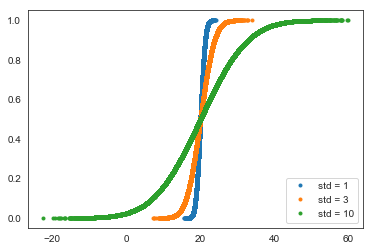

In [29]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1) 
x_std3, y_std3 = ecdf(samples_std3)  
x_std10, y_std10= ecdf(samples_std10) 

# Plot CDFs
plt.plot(x_std1, y_std1 , marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3 , marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10 , marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, it is loaded to belmont_no_outliers. 

In [30]:
belmont = pd.read_csv('belmont.csv')
belmont_no_outliers = belmont[~((belmont['Year'] == 1970) | (belmont['Year'] == 1973))].Time

In [31]:
def convert(x): 
    return float(x.split(':')[0]) * 60 + float(x.split(':')[1].split('.')[0]) + float(x.split('.')[-1])/100
belmont_no_outliers = belmont_no_outliers.apply(convert)

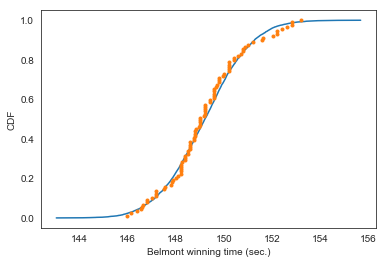

In [32]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')

### What are the chances of a horse matching or beating Secretariat's record?

In [33]:
mu = 149.22101123595507 
sigma = 1.627816471774816

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / 1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000638


### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [34]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles
Use the sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

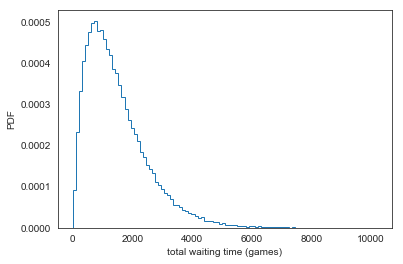

In [35]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')